 Program 1 Quiz #3 Soal 1: "Sequential Search" 

In [64]:
A = [10, 50, 30, 70, 80, 20]
x = 30

def sequential_search(A, n, x):
    for i in range(n):
        if A[i] == x:
            return i
    return -1

indeks = sequential_search(A, len(A), x)

if indeks != -1:
    print(f"Nilai {x} ditemukan pada indeks ke-{indeks}")
else:
    print(f"Nilai {x} tidak ditemukan dalam array")

Nilai 30 ditemukan pada indeks ke-2


Program 2 Quiz #3 Soal 2: "Insetion Sort"

In [65]:

def insertion_sort(A):
    n = len(A)
    for i in range(1, n):
        kunci = A[i]
        j = i - 1
        while j >= 0 and A[j] > kunci:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = kunci
        
data = [64, 34, 25, 12, 22, 11, 90]
print("Array sebelum diurutkan: ", data)
insertion_sort(data)
print("Array yang telah diurutkan secara menaik: ", data)

Array sebelum diurutkan:  [64, 34, 25, 12, 22, 11, 90]
Array yang telah diurutkan secara menaik:  [11, 12, 22, 25, 34, 64, 90]


Program 5 (Listing 3): "Data Osilasi" Versi Phython "Membaca file teks baris per baris (Native Python)"

In [66]:
# Contoh membaca data sederhana
data_x = []
data_y = []

# 'r' untuk read (membaca). Blok 'with' otomatis melakukan close()
try:
    with open('damped_osc.dat', 'r') as file:
        for line in file:
            # Mengabaikan baris komentar (diawali #)
            if line.startswith('#'):
                continue
            
        # Memecah baris berdasarkan spasi/tab 
        parts = line.split()
        
        # Menyimpan ke list
        data_x.append(float(parts[0]))
        data_y.append(float(parts[1]))
        
    print(f"Berhasil membaca {len(data_x)} titik data.")
except FileNotFoundError:
    print("File tidak ditemukan!")
            

Berhasil membaca 1 titik data.


Program 6 (Listing 4): "Membaca data menggunakan NumPy"

Data Loaded. Max X: 1.0


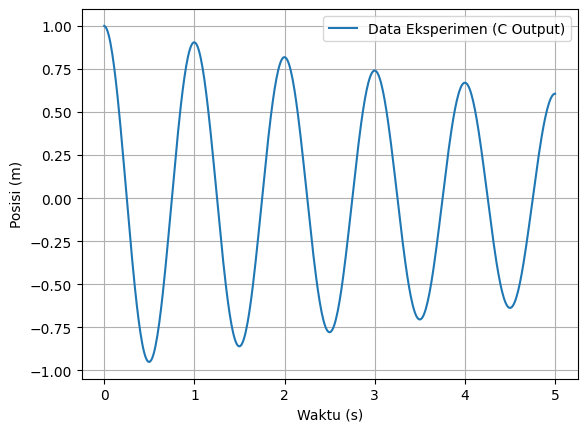

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Membaca data dari file yang dibuat oleh Program C tadi
# unpack = True membalik matriks sehingga kita bisa langsung assign ke variabel t, x
# comments = '#' memberitahu numpy untuk mengabaikan header
t, x = np.loadtxt('damped_osc.dat', unpack=True, comments='#')

print(f"Data Loaded. Max X: {np.max(x)}")

# Plotting sederhana untuk verifikasi
plt.plot(t, x, label='Data Eksperimen (C Output)')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.grid(True)
plt.legend()
# plt.show() # Uncomment untuk menampilkan

Program 7 (Listing 5): "Menyimpan hasil analisis ke file baru"

In [70]:
# Misalkan kita menghitung Energi potensial: V = 0.5 * k * x^2
k = 10.0 # N/m
v_pot = 0.5 * k * x**2

# Kita ingin menyimpan data t, x, dan v_pot (3 kolom)
# column_stack menggabungkan array 1D menjadi kolom-kolom
data_to_save = np.column_stack((t, x, v_pot))

# Header ditambahkan agar file informatif
header_txt = "Time (s)  Position (m)  PotentialEnergy (J)"

np.savetxt('energy_analysis.txt', data_to_save, fmt='%.4e', delimiter='\t', header=header_txt)

print("Analisis energi disimpan ke 'energy_analysis.txt'")

Analisis energi disimpan ke 'energy_analysis.txt'


Program 9 (Listing 7): "Pengolahan Data XRD (Python)"

In [71]:
import numpy as np

# 1. Membaca data
# skiprows=5 sangat penting untuk melewati metadata
filename = 'raw_xrd.dat'
print(f"Sedang memproses {filename}...")

try:
    angle, counts = np.loadtxt(filename, skiprows=5, unpack=True)
except ValueError:
    print("Format file salah atau header tidak sesuai!")
    exit()
    
# 2. Analisis data
max_counts = np.max(counts)
max_idx = np.argmax(counts)
peak_angle = angle[max_idx]

print(f"Intensitas maksimum: {max_counts} pada sudut {peak_angle} derajat.")

# 3. Operasi Vektorisasi (Normalisasi)
# NumPy memungkinkan kita membagi seluruh array tanpa loop
normalized_counts = counts / max_counts

# 4. Filter Data (Contoh Logika Fisika)
# Kita hanya ingin menyimpan data dengan intensitas signifikan (> 0.1)
mask = normalized_counts > 0.1
filtered_angle = angle[mask]
filtered_counts = normalized_counts[mask]

# 5. Menyimpan hasil ke CSV (Format yang bisa dibuka Excel)
output_data = np.column_stack((filtered_angle, filtered_counts))
np.savetxt('processed_xrd.csv', output_data, delimiter=',', header='TwoTheta,NormIntensity', fmt=['%.2f', '%.4f'], comments='')
# Format berbeda tiap kolom
# Hilangkan tanda # agar header bersih untuk Excel

print("Data ternormalisasi disimpan ke 'processed_xrd.csv'")

Sedang memproses raw_xrd.dat...
Intensitas maksimum: 1040.0 pada sudut 28.4 derajat.
Data ternormalisasi disimpan ke 'processed_xrd.csv'
